In [ ]:
# подключаем библиотеки
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

In [2]:
# загружаем данные 
data = pd.read_csv("train.csv")

In [41]:
# нормализация
# data.name = data.name.str.lower()
# data.name = data.name.str.replace(u'"',u'')
# data.name = data.name.str.replace(u'[\/ \( \) \*]',u' ')
# data.name = data.name.str.replace(u'  *',' ')
# data.name = data.name.str.replace(u' - ?', u'-')

С кросс валидацией

In [3]:
# создаём словарь всех слов присутствующих в выборке
cv = CountVectorizer()
# векторизируем словарь
X_train_counts = cv.fit_transform(data.name)
# создаём классификатор и обучаем его на тестовой выборке

In [4]:
clf = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=1,weights = 'uniform')
knn2 = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
rf = RandomForestClassifier(n_estimators=600)

In [5]:
%%time
# производим кросс валидацию и выводим полученный массив и среднее
clf_score = cross_val_score(clf, X_train_counts, data.tare)

CPU times: user 401 ms, sys: 3.05 ms, total: 404 ms
Wall time: 432 ms


In [6]:
%%time
rf_score = cross_val_score(rf, X_train_counts, data.tare)

CPU times: user 21min 53s, sys: 4.15 s, total: 21min 57s
Wall time: 22min


In [5]:
%%time
knn_score = cross_val_score(knn, X_train_counts, data.tare)

CPU times: user 7.64 s, sys: 5.08 s, total: 12.7 s
Wall time: 13.1 s


In [6]:
%%time
knn2_score = cross_val_score(knn2, X_train_counts, data.tare)

CPU times: user 9.69 s, sys: 4.86 s, total: 14.5 s
Wall time: 14.7 s


In [8]:
print('{}\nclf {:%}'.format(clf_score, clf_score.mean()))

[0.76713137 0.77493172 0.77111636]
clf 77.105982%


In [9]:
print('{}\nrf {:%}'.format(rf_score, rf_score.mean()))

[0.83698458 0.83989075 0.83919079]
rf 83.868871%


In [7]:
print('{}\nknn {:%} '.format(knn_score, knn_score.mean()))

[0.80489784 0.81265225 0.80456291]
knn 80.737100% 


In [8]:
print('{}\nknn2 {:%} '.format(knn2_score, knn2_score.mean()))

[0.80792211 0.81250461 0.80404607]
knn2 80.815760% 


Без кросс валидации

In [3]:
# разбиваем их на обучающую и тестовую выборки
X_train, X_holdout, y_train, y_holdout = train_test_split(data.name, data.tare, test_size=0.3, random_state=17)

In [4]:
# создаём словарь всех слов присутствующих в выборке
cv = CountVectorizer()
# векторизируем словарь без кросс валидации
X_train_counts = cv.fit_transform(X_train)
# вектроризируем тестовую выборку ранее составленным словарём
X_test_count = cv.transform(X_holdout)

In [5]:
%%time
# создаём классификатор и обучаем его на тестовой выборке
clf = MultinomialNB().fit(X_train_counts, y_train)

CPU times: user 77.5 ms, sys: 4.1 ms, total: 81.6 ms
Wall time: 81 ms


In [6]:
%%time
# создаём класификатор методом случайного леса
rf = RandomForestClassifier(n_estimators=600)

CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 37.9 µs


In [7]:
%%time
#обучаем классифкатор
rf.fit(X_train_counts, y_train);

CPU times: user 5min 6s, sys: 1.08 s, total: 5min 7s
Wall time: 5min 7s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
%%time
# создаём класификатор методом ближайших соседей
knn = KNeighborsClassifier(n_neighbors=1,weights = 'uniform')

CPU times: user 18 µs, sys: 1 µs, total: 19 µs
Wall time: 21.2 µs


In [6]:
%%time
#обучаем классифкатор
knn.fit(X_train_counts, y_train);

CPU times: user 25.9 ms, sys: 72 µs, total: 26 ms
Wall time: 25.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
%%time
# создаём класификатор методом ближайших соседей
knn2 = KNeighborsClassifier(n_neighbors=3,weights = 'distance')

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 17.9 µs


In [8]:
%%time
knn2.fit(X_train_counts, y_train);

CPU times: user 24.2 ms, sys: 0 ns, total: 24.2 ms
Wall time: 23.6 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [8]:
%%time
#вывод показателей точности предсказания по 3м моделям
print('clf {:%} '.format(clf.score(X_test_count,y_holdout)))

clf 77.613776% 
CPU times: user 15 ms, sys: 7 µs, total: 15 ms
Wall time: 14 ms


In [9]:
%%time
print('RF {:%} '.format(rf.score(X_test_count,y_holdout)))

RF 83.599836% 
CPU times: user 5.45 s, sys: 18 µs, total: 5.45 s
Wall time: 5.46 s


In [9]:
%%time
print('kNN {:%} '.format(knn.score(X_test_count,y_holdout)))

kNN 82.050021% 
CPU times: user 2.4 s, sys: 1.7 s, total: 4.1 s
Wall time: 4.67 s


In [10]:
%%time
print('kNN2 {:%} '.format(knn2.score(X_test_count,y_holdout)))

kNN2 81.558016% 
CPU times: user 3 s, sys: 1.6 s, total: 4.6 s
Wall time: 8.92 s


Анализ данных

In [3]:
# Обучаем алгоритмы на полной выборке для проведения графического анализа.
cv = CountVectorizer()
X_train_counts = cv.fit_transform(data.name)

In [4]:
%%time
clf = MultinomialNB().fit(X_train_counts, data.tare)

Wall time: 1.1 s


In [5]:
%%time
knn = KNeighborsClassifier(n_neighbors=1,weights = 'uniform')
knn.fit(X_train_counts, data.tare)

Wall time: 37 ms


In [6]:
%%time
knn2 = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
knn2.fit(X_train_counts, data.tare)

Wall time: 38 ms


In [7]:
%%time
rf = RandomForestClassifier(n_estimators=600)
rf.fit(X_train_counts, data.tare)

Wall time: 15min 6s


In [6]:
# предсказываем на тестовой выборке и сохраняем в файлы
data_test = pd.read_csv("test.csv")
X_test_counts = cv.transform(data_test.name)
split_test1, split_test2 = train_test_split(data_test.name, test_size=0.5)
X_test_counts1 = cv.transform(split_test1)
X_test_counts2 = cv.transform(split_test2)

In [7]:
%%time
predict_clf = clf.predict(X_test_counts);
df = pd.DataFrame({'name': data_test.name, 'predicted': predict_clf}).to_csv("predict_clf.csv")

CPU times: user 63.4 ms, sys: 3.04 ms, total: 66.5 ms
Wall time: 78.7 ms


In [12]:
%%time
predict1_knn = knn.predict(X_test_counts1);

CPU times: user 2.77 s, sys: 1.85 s, total: 4.63 s
Wall time: 5.92 s


In [13]:
%%time
predict2_knn = knn.predict(X_test_counts2);

CPU times: user 2.77 s, sys: 1.82 s, total: 4.59 s
Wall time: 4.87 s


In [21]:
df = pd.DataFrame({'name': split_test1, 'predicted': predict1_knn})
df2 = pd.DataFrame({'name': split_test2, 'predicted': predict2_knn})
df = df.append(df2)
df.to_csv("predict_knn.csv")

In [27]:
%%time
predict1_knn2 = knn2.predict(X_test_counts1);

CPU times: user 3.48 s, sys: 1.82 s, total: 5.3 s
Wall time: 7.84 s


In [28]:
%%time
predict2_knn2 = knn2.predict(X_test_counts2);

CPU times: user 3.39 s, sys: 1.85 s, total: 5.24 s
Wall time: 5.35 s


In [29]:
df = pd.DataFrame({'name': split_test1, 'predicted': predict1_knn2})
df2 = pd.DataFrame({'name': split_test2, 'predicted': predict2_knn2})
df = df.append(df2)
df.to_csv("predict_knn2.csv")

In [8]:
%%time
predict_rf = rf.predict(X_test_counts);
df = pd.DataFrame({'name': data_test.name, 'predicted': predict_rf}).to_csv("predict_rf.csv")

CPU times: user 9.6 s, sys: 3.99 ms, total: 9.6 s
Wall time: 9.64 s


In [3]:
# Загружаем полученные файлы в память
df_clf = pd.read_csv("predict_clf.csv")
df_knn = pd.read_csv("predict_knn.csv")
df_knn2 = pd.read_csv("predict_knn2.csv")
df_rf = pd.read_csv("predict_rf.csv")

In [176]:
df = pd.DataFrame(columns=['tare'])
df.tare = data.tare.value_counts().keys()
dfreal = pd.DataFrame({'real' :data.tare.value_counts(normalize=True).values, 'tare': data.tare.value_counts().keys()})
dfclf = pd.DataFrame({'clf' : df_clf.predicted.value_counts(normalize=True).values, 'tare': df_clf.predicted.value_counts().keys()})
dfknn = pd.DataFrame({'knn' : df_knn.predicted.value_counts(normalize=True).values, 'tare': df_knn.predicted.value_counts().keys()})
dfknn2 = pd.DataFrame({'knn2' : df_knn2.predicted.value_counts(normalize=True).values, 'tare': df_knn2.predicted.value_counts().keys()})
dfrf = pd.DataFrame({'rf' : df_rf.predicted.value_counts(normalize=True).values, 'tare': df_rf.predicted.value_counts().keys()})
df = df.join(dfreal.set_index('tare'), on='tare')
df = df.join(dfclf.set_index('tare'), on='tare')
df = df.join(dfknn.set_index('tare'), on='tare')
df = df.join(dfknn2.set_index('tare'), on='tare')
df = df.join(dfrf.set_index('tare'), on='tare')
df

,tare,real,clf,knn,knn2,rf
0,пакет без формы,0.222102,0.288709,0.220409,0.209194,0.304521
1,бутылка,0.183871,0.203637,0.184339,0.235261,0.202273
2,коробка,0.103228,0.103359,0.096236,0.096287,0.092751
3,пакет прямоугольный,0.086130,0.073402,0.090326,0.086032,0.075322
4,обертка,0.079143,0.087093,0.072796,0.072190,0.063905
5,банка неметаллическая,0.055058,0.061581,0.049861,0.055216,0.057388
6,стаканчик,0.050925,0.043445,0.040414,0.030311,0.034403
7,банка металлическая,0.045193,0.035817,0.041121,0.043799,0.041172
8,вакуумная упаковка,0.026348,0.024400,0.063349,0.039808,0.022076
9,усадочная упаковка,0.024429,0.009245,0.020056,0.014398,0.011670


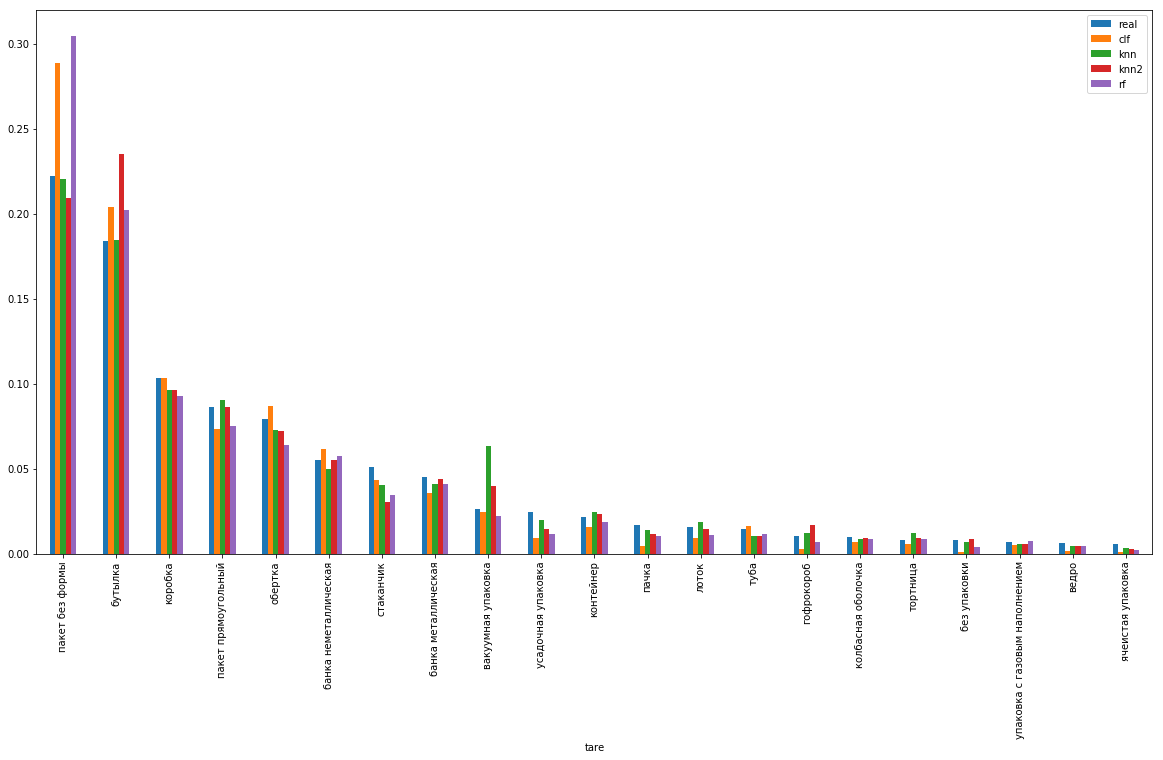

In [191]:
df.plot(x=df.tare, kind='bar', figsize=(20,10))


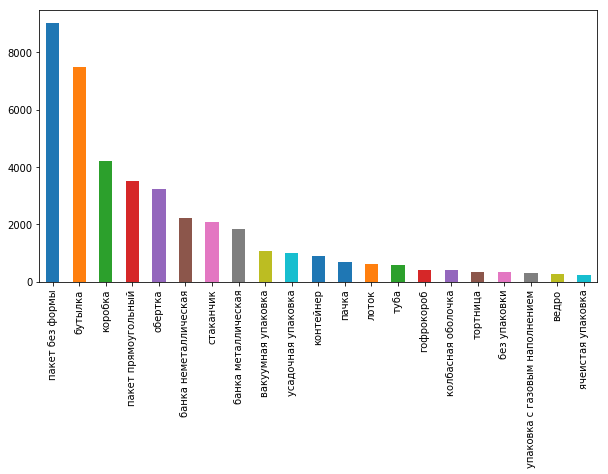

In [12]:
# посмотрим распределение аидов упаковок у различных видов алгоритмов
data.tare.value_counts().plot(kind='bar', figsize=(10,5))

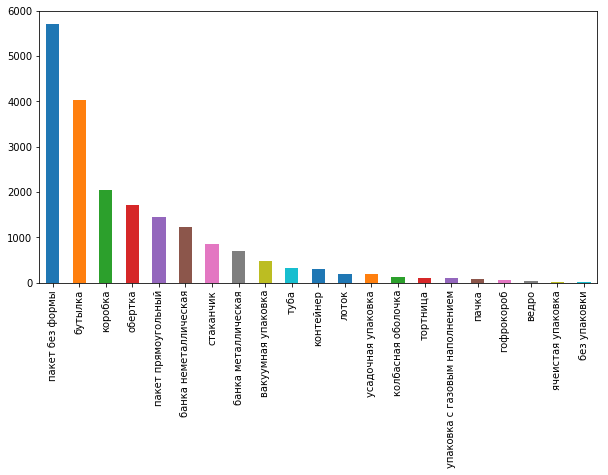

In [13]:
df_clf.predicted.value_counts().plot(kind='bar', figsize=(10,5))

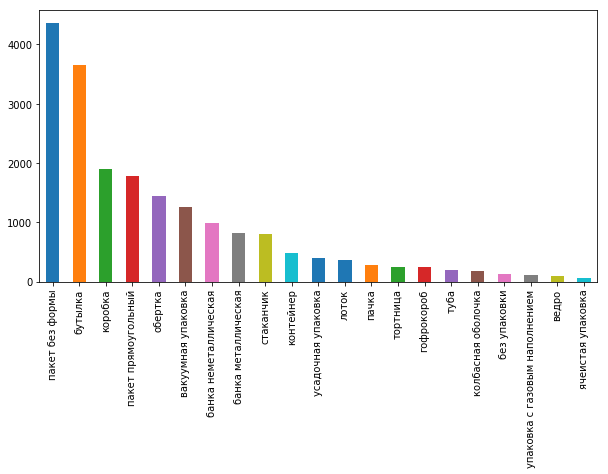

In [14]:
df_knn.predicted.value_counts().plot(kind='bar', figsize=(10,5))

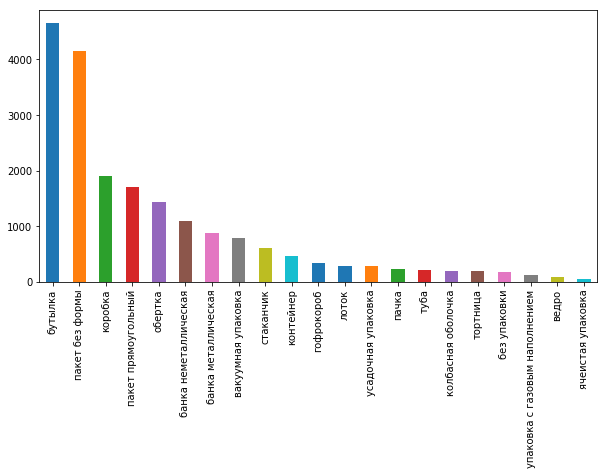

In [15]:
df_knn2.predicted.value_counts().plot(kind='bar', figsize=(10,5))

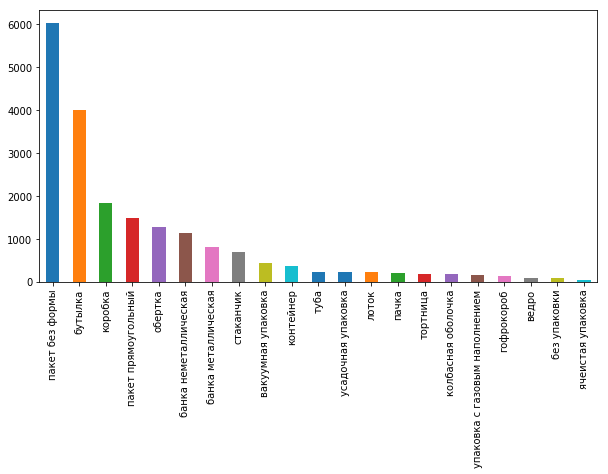

In [16]:
df_rf.predicted.value_counts().plot(kind='bar', figsize=(10,5))

Подбор параметров

In [29]:
cv = CountVectorizer()
X_train_counts = cv.fit_transform(data.name)
y_train = data.tare

In [61]:
# списки признаков для проверки
n_naigbors = [1,2,3,4,5,6,7,8,9,10,15,20]
weights_s = ['uniform', 'distance']
n_trees = list(range(100,1000,100))
max_depths = (list(range(100,1000,100))) + ['auto']

In [10]:
# создаём классификаторы
job_knn = KNeighborsClassifier(n_jobs=-1)
knn_grid = GridSearchCV(job_knn, param_grid={'n_neighbors': n_naigbors, 'weights': weights_s})

In [63]:
job_rf = RandomForestClassifier(n_jobs=2)
rf_grid = GridSearchCV(job_rf, param_grid={'n_estimators': n_trees, 'max_depth': max_depths})

In [ ]:
%%time 
# обучаем несколько раз
knn_grid.fit(X_train_counts, y_train)

In [ ]:
%%time
rf_grid.fit(X_train_counts, y_train)

In [ ]:
# выводим наилучшие значения параметров и соответствующее им качество
print('knn naigbours: {} : {}'.format(knn_grid.best_params_, knn_grid.best_score_))
print('rf trees: {} : {}'.format(rf_grid.best_params_, rf_grid.best_score_))

In [12]:
test_probe = pd.DataFrame(["сок добрый 1л"])[0]
print('clf:{}'.format(clf.predict(cv.transform(test_probe))))
print('rf :{}'.format(rf.predict(cv.transform(test_probe))))
print('knn:{}'.format(knn.predict(cv.transform(test_probe))))
print('knn2:{}'.format(knn2.predict(cv.transform(test_probe)))) 

clf:['пакет прямоугольный']
rf :['пакет прямоугольный']
knn:['пакет прямоугольный']
knn2:['пакет прямоугольный']
